# Predicción de Cancer de mama


### Objetivo
Usaremos un flujo de trabajo ML para diagnosticar el cáncer como benigno (no se expande al resto del cuerpo) o maligno (se expande al resto del cuerpo). La idea es proporcionar un detección temprana del cancer para evitar su expansión

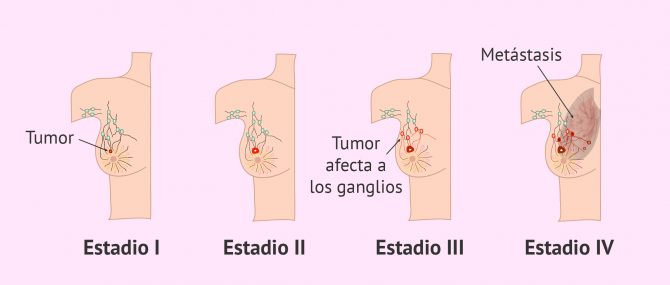

Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

La idea de la primera clase es aprender a realizar una exploración exhaustiva de los datos. Posteriormente se aprenderá a aplicar técnicas de selección de características. De evaluará el/los modelos aplicando y sin aplicar técnicas de Feature Selection y compararemos resultados.

## Preparar entorno de trabajo

### Crear entorno virtual (Conda/Python env)

Una vez creado activamos el entorno con 'conda activate myentorno' para instalar la librerías necesarias

### Instalamos las librerías necesarias

Para instalar las librerías podemos hacerlo mediante "pip install" o "conda install"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Paso 1: Adquisición de los datos

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [3]:
# Observación de todos los elementos del dataset
# display(breast_cancer)

In [4]:
# Elementos del dataset
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# print(breast_cancer.DESCR[27:3130])

In [6]:
# Observación de variables target
# print(breast_cancer.data)
# print(breast_cancer.target)
print(breast_cancer.target_names)

['malignant' 'benign']


In [7]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(breast_cancer.filename)
print(breast_cancer.data_module)

breast_cancer.csv
sklearn.datasets.data


### Lectura de los datos
Crearemos un dataframe y lo rellenaremos con cada una de las "features" del dataset

In [9]:
# cargamos los datos en un dataframe 
df_features = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
# Obtenemos información general del dataset
# df_features.info()

In [10]:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Lectura de la variable "target"

In [11]:
# 1 - Benigno
# 0 - Maligno
df_target = pd.DataFrame(breast_cancer.target, columns=['target'])
# df_target.head()

In [12]:
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Según la descripción del conjunto de datos, la distribución de la variable objetivo es: 212 - Maligno, 357 - Benigno. Por lo tanto, "benign" y "maglinant" se presentan como 1 y 0, respectivamente.

Para empezar a trabajar concatenamos ambos dataframes: características (Features) y variable objetivo (target)

In [13]:
df = pd.concat([df_features, df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Exploración de los datos

Antes de comenzar con la exploración de los datos vamos a asignarle nombre a la variable "target". Por lo tanto, indicaremos que:
- target = 1 (benigno) 
- target = 0 (maligno)

In [14]:
# Podríamos añadir una nueva columna categórica como hicimos en el análisis de supervivencia
# df.loc[data.target == 1, 'cancer'] = "Malignant"
# df.loc[data.target == 0, 'cancer'] = "Benign"

df['target'] = df['target'].apply(lambda x: "Benign"
                                  if x == 1 else "Malignant")
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [15]:
# Obtenemos información adicional sobre el conjunto de datos
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
df['target']

0      Malignant
1      Malignant
2      Malignant
3      Malignant
4      Malignant
         ...    
564    Malignant
565    Malignant
566    Malignant
567    Malignant
568       Benign
Name: target, Length: 569, dtype: object

In [17]:
df_target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


#### Distribución de la variable objetivo mediante histograma

AxesSubplot(0.125,0.125;0.775x0.755)
Benign       357
Malignant    212
Name: target, dtype: int64


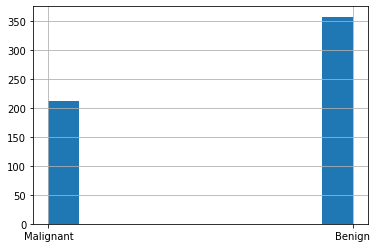

In [18]:
print(df["target"].hist())
print(df['target'].value_counts())

Como ya hemos visto antes, la distribución de la variable objetivo es: 
- 212 - Maligno, 
- 357 - Benigno. 

Para visualizar la distribución de los datos mejor utilizaremos la librería seaborn

Text(0.5, 1.0, 'Distribución de la diagnosis')

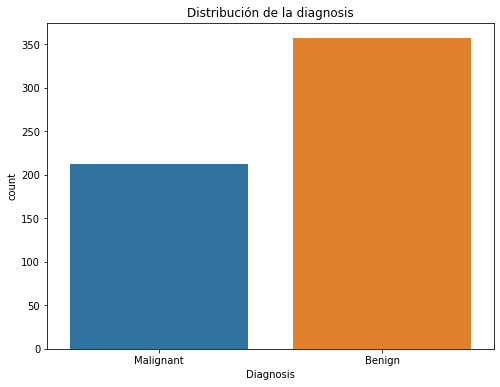

In [19]:
# set_style nos permite cambiar los colores de nuestras gráficas (mirar la documentación)
# sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(df['target'])
plt.xlabel("Diagnosis")
plt.title("Distribución de la diagnosis")

### Distribución de características

Ahora echaré un vistazo a la distribución de cada característica y veré en qué se diferencian entre 'benigno' y 'maligno'. Para ver la distribución de múltiples variables, podemos usar el diagrama de violín, el diagrama de enjambre o el diagrama de caja. 
Vamos a probar cada una de estas técnicas.

#### ¡OJO! ESTANDARIZAR LOS DATOS
Para visualizar distribuciones de múltiples características en una figura, primero necesito estandarizar los datos:

In [20]:
from sklearn.preprocessing import StandardScaler

# Estandarizamos solo las características (features) del dataset
# Si tuviesemos que estandarizar también nuestra variable target se haría por separado
scaler = StandardScaler()
scaler.fit(df_features)
features_scaled = scaler.transform(df_features)

# Concatenamos de nuevo nuestras características estandarizadas con la variable target que queremos predecir
features_scaled = pd.DataFrame(data=features_scaled,
                               columns=df_features.columns)

df_scaled = pd.concat([features_scaled, df['target']], axis=1)

Ahora podemos observar que nuestros datos han sido escalados correctamente

In [21]:
df_scaled.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,Malignant
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,Malignant
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,Malignant


In [22]:
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Cabe destacar que ahora todas las columnas (features) estan comprendidas en un mismo rango de valoresc

Antes de visualizar vamos a crear un dataframe para que nos sea mas fácil el manejo de los datos para la visualización.

Vamos a utilizar la función pandas.melt(). Esta función es útil para transformar un DataFrame en un formato en el que una o más columnas son variables de identificación (id_vars), mientras que todas las demás columnas, serán consideradas variables de características.

In [23]:
df_scaled_melt = pd.melt(df_scaled, id_vars='target',
                         var_name='features', value_name='value')
df_scaled_melt.head(3)

,target,features,value
0,Malignant,mean radius,1.097064
1,Malignant,mean radius,1.829821
2,Malignant,mean radius,1.579888


Para observar la distribución de los datos vamos a crear tres visualizaciones distintas (aunque con una sería suficiente, el uso de más gráficas de distribución de variables nos puede proporcionar información adicional):
- BOX PLOT:  es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana y los cuartiles de los datos, y también pueden representarse sus valores atípicos. 
VEASE (https://es.wikipedia.org/wiki/Diagrama_de_caja) para la interpretación del diagrama de cajas
- SWARM PLOT: Un diagrama de enjambre es otra forma de trazar la distribución de un atributo o la distribución conjunta de un par de atributos.
- VIOLIN PLOT: Los diagramas de violín son similares a los diagramas de caja (box plot), excepto que también muestran la densidad de probabilidad de los datos en diferentes valores. Estos gráficos incluyen un marcador para la mediana de los datos y un cuadro que indica el rango intercuartílico, como en los gráficos de caja estándar. En este diagrama de caja se superpone una estimación de la densidad del núcleo. Al igual que los diagramas de caja, los diagramas de violín se utilizan para representar la comparación de una distribución variable (o distribución de muestra) entre diferentes "categorías".


Como hay 30 características en nuestro dataset utlizaremos 10 para cada uno de los tipos de visualizaciones que hemos expuesto.
 

In [24]:
def violin_plot(features, name):
    """
    This function creates violin plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.violinplot(x='features',
                   y='value',
                   hue='target',
                   data=data,
                   split=True,
                   inner="quart")
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Características")
    plt.ylabel("Datos estandarizados")


def swarm_plot(features, name):
    """
    This function creates swarm plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.swarmplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Características")
    plt.ylabel("Datos estandarizados")


def box_plot(features, name):
    """
    This function creates box plots of features given in the argument.
    """
    # Create query
    query = ''
    for x in features:
        query += "features == '" + str(x) + "' or "
    query = query[0:-4]

    # Create data for visualization
    data = df_scaled_melt.query(query)

    # Plot figure
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='features', y='value', hue='target', data=data)
    plt.xticks(rotation=45)
    plt.title(name)
    plt.xlabel("Características")
    plt.ylabel("Datos estandarizados")

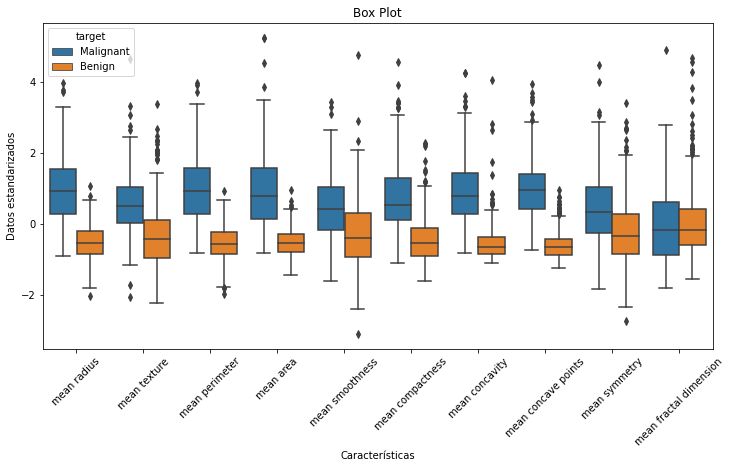

In [25]:
# Visualizamos la distribución de las diez primeras características
box_plot(df.columns[0:10], "Box Plot")

/home/eric/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 72.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eric/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 68.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eric/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 73.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/eric/anaconda3/envs/Machine_Learning/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 75.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

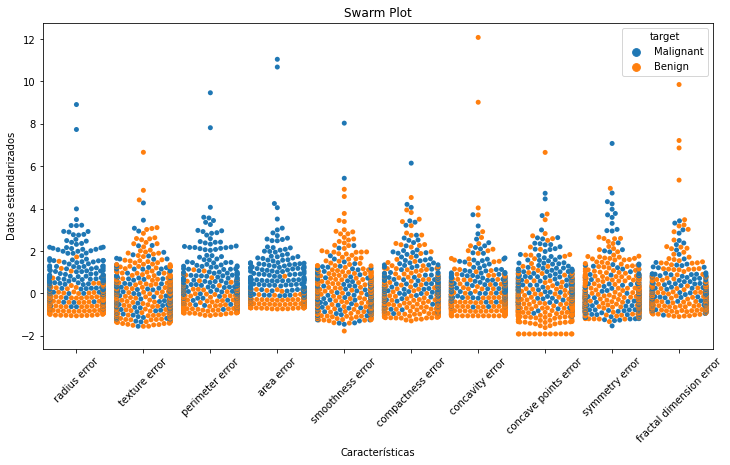

In [26]:
swarm_plot(df.columns[10:20], "Swarm Plot")

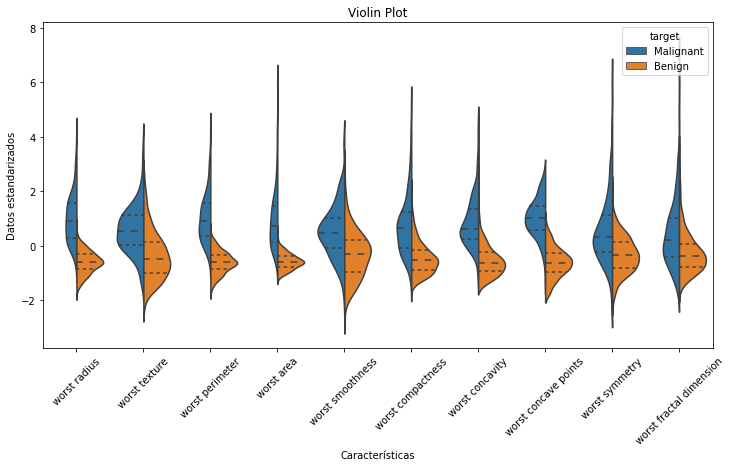

In [27]:
violin_plot(df.columns[20:30], "Violin Plot")

De los gráficos anteriores, podemos extraer algunas ideas de los datos:

- La mediana de algunas características es muy diferente entre "malignas" y "benignas". Esta separación se puede ver claramente en los diagramas de caja. Pueden ser muy buenas características para la clasificación. Por ejemplo:mean radius, mean area, mean concave points, worst radius, worst perimeter, worst area, worst concave points.
- Sin embargo, hay distribuciones que parecen similares entre "maligno" y "benigno". Por ejemplo:  mean smoothness, mean symmetry, mean fractual dimension, smoothness error. Por lo tanto, estas características no nos proporcionarán mucha ayuda en la tarea de clasificación.
- Otras características tienen distribuciones similares, por lo que pueden estar altamente correlacionadas entre sí. Por ejemplo: mean perimeter vs. mean area, mean concavity vs. mean concave points y  worst symmetry vs. worst fractal dimension. Por lo tanto, quizás no deberíamos incluir estas variables altamente correlacionadas.

###  Correlación entre variables

Como se ha observado anteriormente, algunas variables en el conjunto de datos pueden estar altamente correlacionadas entre sí. Exploremos la correlación de los tres ejemplos anteriores.

In [28]:
def correlation(var):
    """
    1. Print correlation
    2. Create jointplot
    """
    # Print correlation
    print("Correlation: ", df[[var[0], var[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(df[(var[0])], df[(var[1])], kind='reg')

Correlation:  0.9865068039913907


<Figure size 432x432 with 0 Axes>

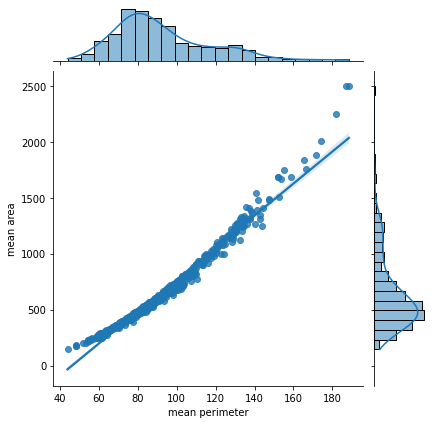

In [29]:
correlation(['mean perimeter', 'mean area'])

Correlation:  0.9213910263788588


<Figure size 432x432 with 0 Axes>

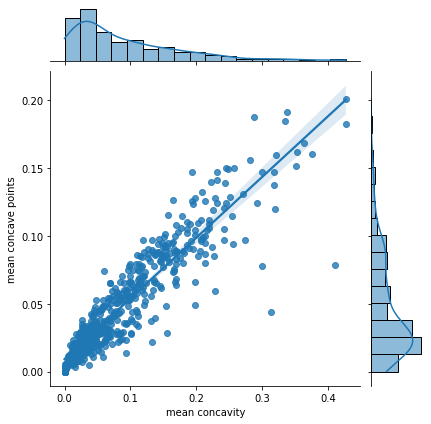

In [30]:
correlation(['mean concavity', 'mean concave points'])

Correlation:  0.537848206253609


<Figure size 432x432 with 0 Axes>

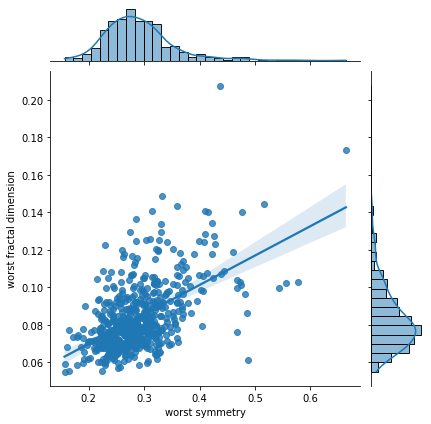

In [31]:
correlation(['worst symmetry', 'worst fractal dimension'])

Dos de los tres conjuntos de variables estan altamente correlados. Una correlación mayor al 90%

Para ver si existe mas correlaciones entre variables podemos hacer un estudio genérico de todas las variables mediante un mapa de calor que nos proporcionará la correlación de todas con todas.

<AxesSubplot:>

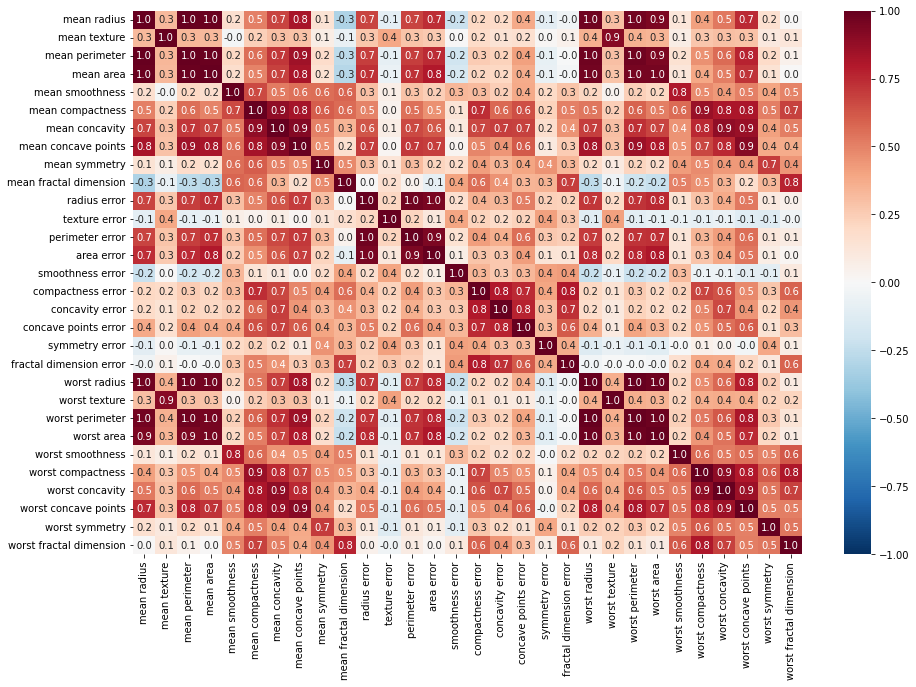

In [32]:
# Creamos la matriz de correlaciones
corr_mat = df.corr()

# Plot heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat, annot=True, fmt='.1f',
            cmap='RdBu_r', vmin=-1, vmax=1)

# Podemos crear una máscara para visualizar la mirad del mapa de correlaciones.
# mask = np.zeros_like(corr_mat, dtype=np.bool)
# mask[np.triu_indices_from(mask, k=1)] = True

# # Plot heatmap
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr_mat, annot=True, fmt='.1f',
#             cmap='RdBu_r', vmin=-1, vmax=1,mask=mask)



En el mapa de calor, podemos ver que muchas variables en el conjunto de datos están altamente correlacionadas. 

Podemos poner un valor umbral para ver qué variables tienen una correlación mayor a un 70% por ejemplo

<AxesSubplot:>

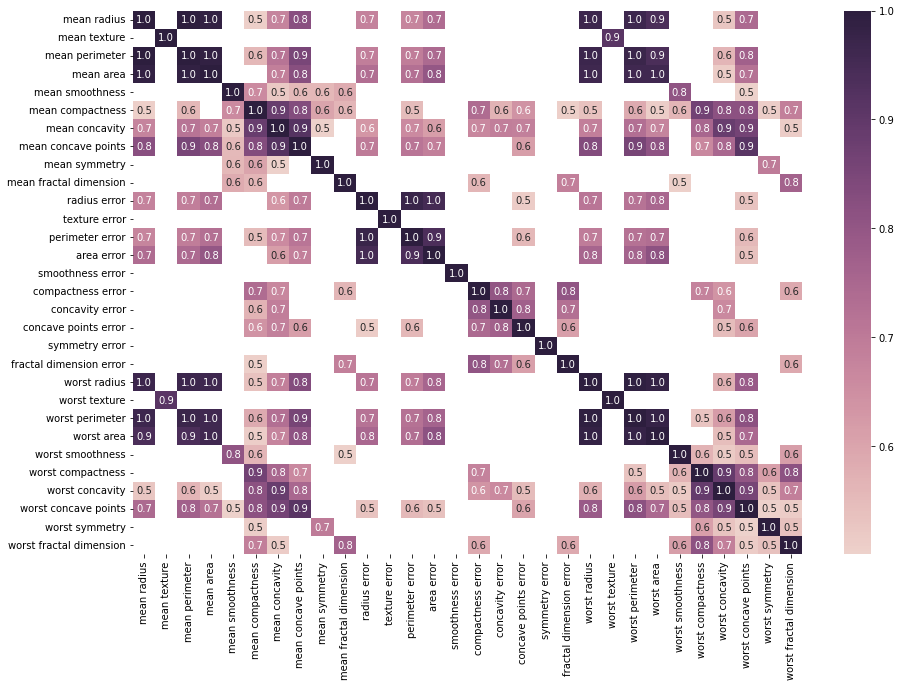

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_mat[corr_mat > 0.5], annot=True, fmt='.1f'
            ,cmap=sns.cubehelix_palette(200))

# Si hemos declarado la mascara podemos visualizarlo con mask
# plt.figure(figsize=(15, 10))
# sns.heatmap(corr_mat[corr_mat > 0.7], annot=True, fmt='.1f'
#             ,cmap=sns.cubehelix_palette(200), mask=mask)

Podemos observar que tenemos muchas variables correlacionadas entre sí. Por lo tanto, podremos aplicar algún algoritmo de selección de variables.

## Paso 2: Preprocesamiento de los datos

Comprobamos si los datos necesitan ser pre-procesados. 

Ahora necesitaríamos estandarizar nuestros datos antes de comenzar a trabajar pero ya lo hemos hecho previamente para visualizar los datos correctamente

In [34]:
# df.isna().sum()

¡POR SUERTE! 
Los datos han sido limpiados y pre-procesados previamente por lo que podemos saltarnos este paso

## Siguientes pasos

Ya hemos visto que aplicando el modelo directamente a nuestro conjunto de datos obtenemos resultados prometedores pero siempre no es así. Por este motivo, vamos a ver que técnicas/métodos podemos utilizar para mejorar la predicción en nuestros resultados.

### Feature Selection (Selección de variables)

Podemos aplicar un algoritmo de selección de variables para quedarnos con las variables más significativas para nuestra clasificación. 

#### Correlation based feature selection (CFS)
En este caso vamos a utilizar Univariate Feature Selection pero podríamos utilizar/probar otro método de selección de variables. Este es un tipo de selección de características basada en correlación (CFS). Es una técnica de selección de características que utiliza el enfoque de filtro. Esta técnica de selección de características no depende de un algoritmo ML que se aplicará a las características seleccionadas. A menudo, los atributos de las características de un conjunto de datos pueden estar muy correlacionados entre sí. Estas características que se correlacionan en gran medida con otras características brindan información redundante. La técnica encuentra la correlación entre características. Las características que están altamente correlacionadas con otras características son excluido por el CFS. De manera similar, las características que se interrelacionan en gran medida con la etiqueta de la clase se conservan y seleccionan.

https://scikit-learn.org/stable/modules/classes.html?highlight=feature%20select#module-sklearn.feature_selection

Elijo 5 porque en el mapa de calor pude ver alrededor de 5 grupos de características que están altamente correlacionadas. Aunque esto es un factor muy personal.

#### Recursive feature elimination (RFE)
La eliminación de características recursivas (RFE) es un método de selección de características que utiliza el enfoque de envoltura dependiente del modelo que se ha implementado previamente. Con este método de selección de variables primero tendremos que entrenar nuestro modelo con todas las variables para ver la importancia de cada una de las variables sobre el modelo. RFE implica la construcción de un modelo ML con todas las características originales en el conjunto de datos y las características se clasifican de acuerdo con su importancia cuantitativa para reducir el error de modelado.  Cada subconjunto de características se califica con una puntuación de precisión. Los subconjuntos de características que tienen las puntuaciones más altas se eligen.

"Los vínculos entre variables con puntuaciones iguales se romperán de una manera no especificada."

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
# Definimos feature Selection K=5
feature_selection = SelectKBest(chi2, k=5)
# Fit Feature Selection
feature_selection.fit(df_features, df_target) #Run score function on (X, y) and get the appropriate features.
# Seleccionamos las características
selected_features = df_features.columns[feature_selection.get_support()]
print("Las características selecionadas son: ", list(selected_features))

Las características selecionadas son:  ['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']


In [36]:
feature_selection

SelectKBest(k=5, score_func=<function chi2 at 0x7fc8557d00d0>)

In [37]:
#Get a mask, or integer index, of the features selected.
feature_selection.get_support()

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False])

In [38]:
# Reduce X to the selected features with .transform(X)
X = pd.DataFrame(feature_selection.transform(df_features),
                 columns=selected_features)
X.head()

,mean perimeter,mean area,area error,worst perimeter,worst area
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0


Vamos a crear un diagrama de pares (PAIRPLOT) para ver cómo se diferencian estas características en 'maligno' y en 'benigno'.

Esta gráfica también es conocida como scatterplot matrix

Una gráfica de pares nos permite ver tanto la distribución de variables individuales como las relaciones entre dos variables. Los diagramas de pares son un gran método para identificar tendencias para el análisis de seguimiento.

El diagrama de pares se basa en dos figuras básicas, el histograma y el diagrama de dispersión. El histograma en la diagonal nos permite ver la distribución de una sola variable, mientras que los diagramas de dispersión en los triángulos superior e inferior muestran la relación (o falta de ella) entre dos variables. 

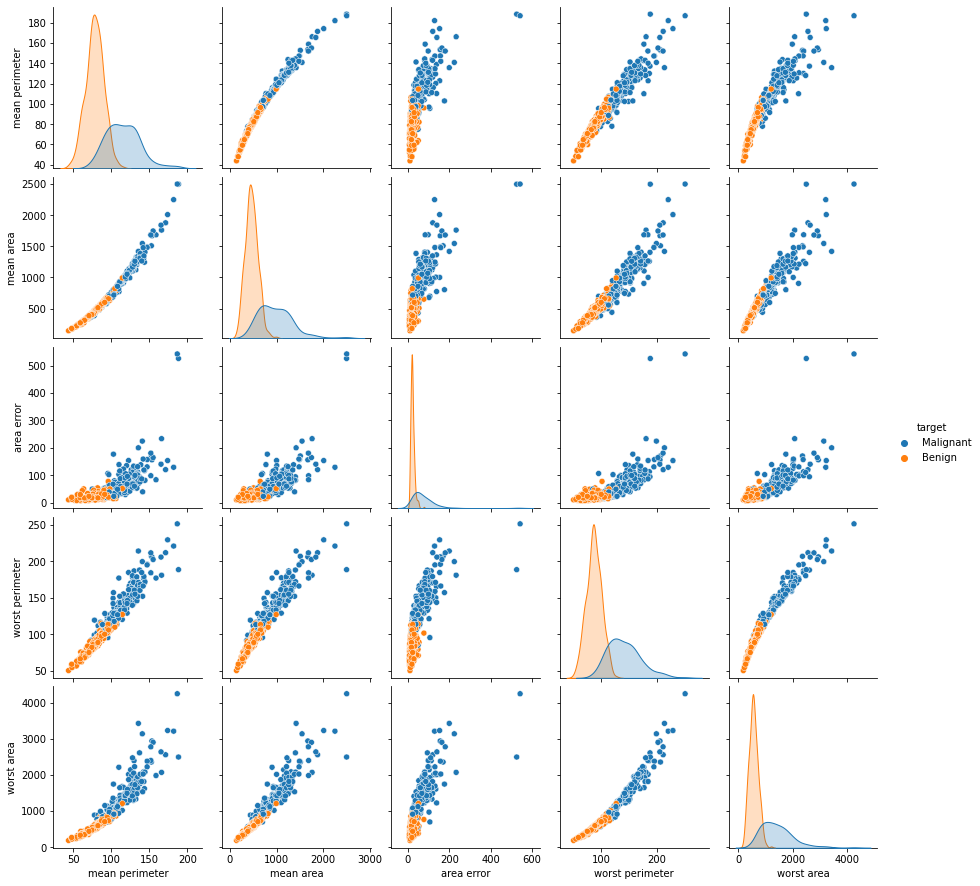

In [39]:
# sns.pairplot(pd.concat([X, df['target']], axis=1))
# Le podemos indicar la variable target para visualizar la diferencia que existe entre Maligno y benigno 
# en cada una de las variables y en la relación entre ellas
sns.pairplot(pd.concat([X, df['target']], axis=1), hue='target')

In [40]:
from sklearn.model_selection import train_test_split
y = df_target['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Ahora nuestro conjunto de entrenamiento solo tendrá las 5 variables que hemos considerado más significado al aplicar el método de Feature Selection (SelectKBest)

In [41]:
print(X.shape)
print(y.shape)

(569, 5)
(569,)


In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200) #random_state = 42
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 65   2]
 [  4 117]]


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        67
           1       0.98      0.97      0.97       121

    accuracy                           0.97       188
   macro avg       0.96      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



accuracy, recall, f1-score es aproximadamente un  97%. 

Se puede observar en la matriz de confusión que el modelo solo ha fallado en 6 predicciones

## Para hacer en clase

Modificar el número de características para entrenar el modelo y observar los resultados.

Por ejemplo:
- k = 5
- k = 10
- k = 20

### Otro Método para feature selection
Ahora podríamos utilizar todo el conjunto de datos para entrenar nuestro algoritmo de Random Forest y llamar a la función “feature_importances_” para obtener la importancia de variables para este modelo en concreto.

In [44]:
from sklearn.model_selection import train_test_split
X = df_features
y = df_target['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)  

In [45]:
X_train.shape

(381, 30)

Primero evaluamos el modelo entrenado con todas las características

In [46]:
# Fit the model
rfc = RandomForestClassifier(n_estimators=200) #random_state = 42
rfc.fit(X_train, y_train)
# Make predictions on test data
y_pred = rfc.predict(X_test)
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 61   6]
 [  2 119]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        67
           1       0.95      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



Por lo general cuando entrenamos el modelo con todas las variables obtenemos resultados bastante peores que si aplicamos selección de características, ya que habrán variables que no sean representativas para el estudio e introducirán ruido en los resultados. Por este motivo, vamos a probar como funciona otro método de Feature Selection.

#### Feature Selection from Random Forest Model

In [47]:
rfc.feature_importances_

array([0.02901274, 0.0145266 , 0.02888759, 0.02860207, 0.00508201,
       0.00757072, 0.07036595, 0.13370754, 0.00336759, 0.00488138,
       0.01735391, 0.00393976, 0.01687591, 0.02813201, 0.00569435,
       0.00570546, 0.0093104 , 0.00602295, 0.00516547, 0.00772641,
       0.09168009, 0.01414991, 0.12724601, 0.11867804, 0.01363236,
       0.01679957, 0.0419305 , 0.12001283, 0.01874439, 0.00519548])

,Features,Gini-Importance
0,mean concave points,0.133708
1,worst perimeter,0.127246
2,worst concave points,0.120013
3,worst area,0.118678
4,worst radius,0.091680
5,mean concavity,0.070366
6,worst concavity,0.041930
7,mean radius,0.029013
8,mean perimeter,0.028888
9,mean area,0.028602


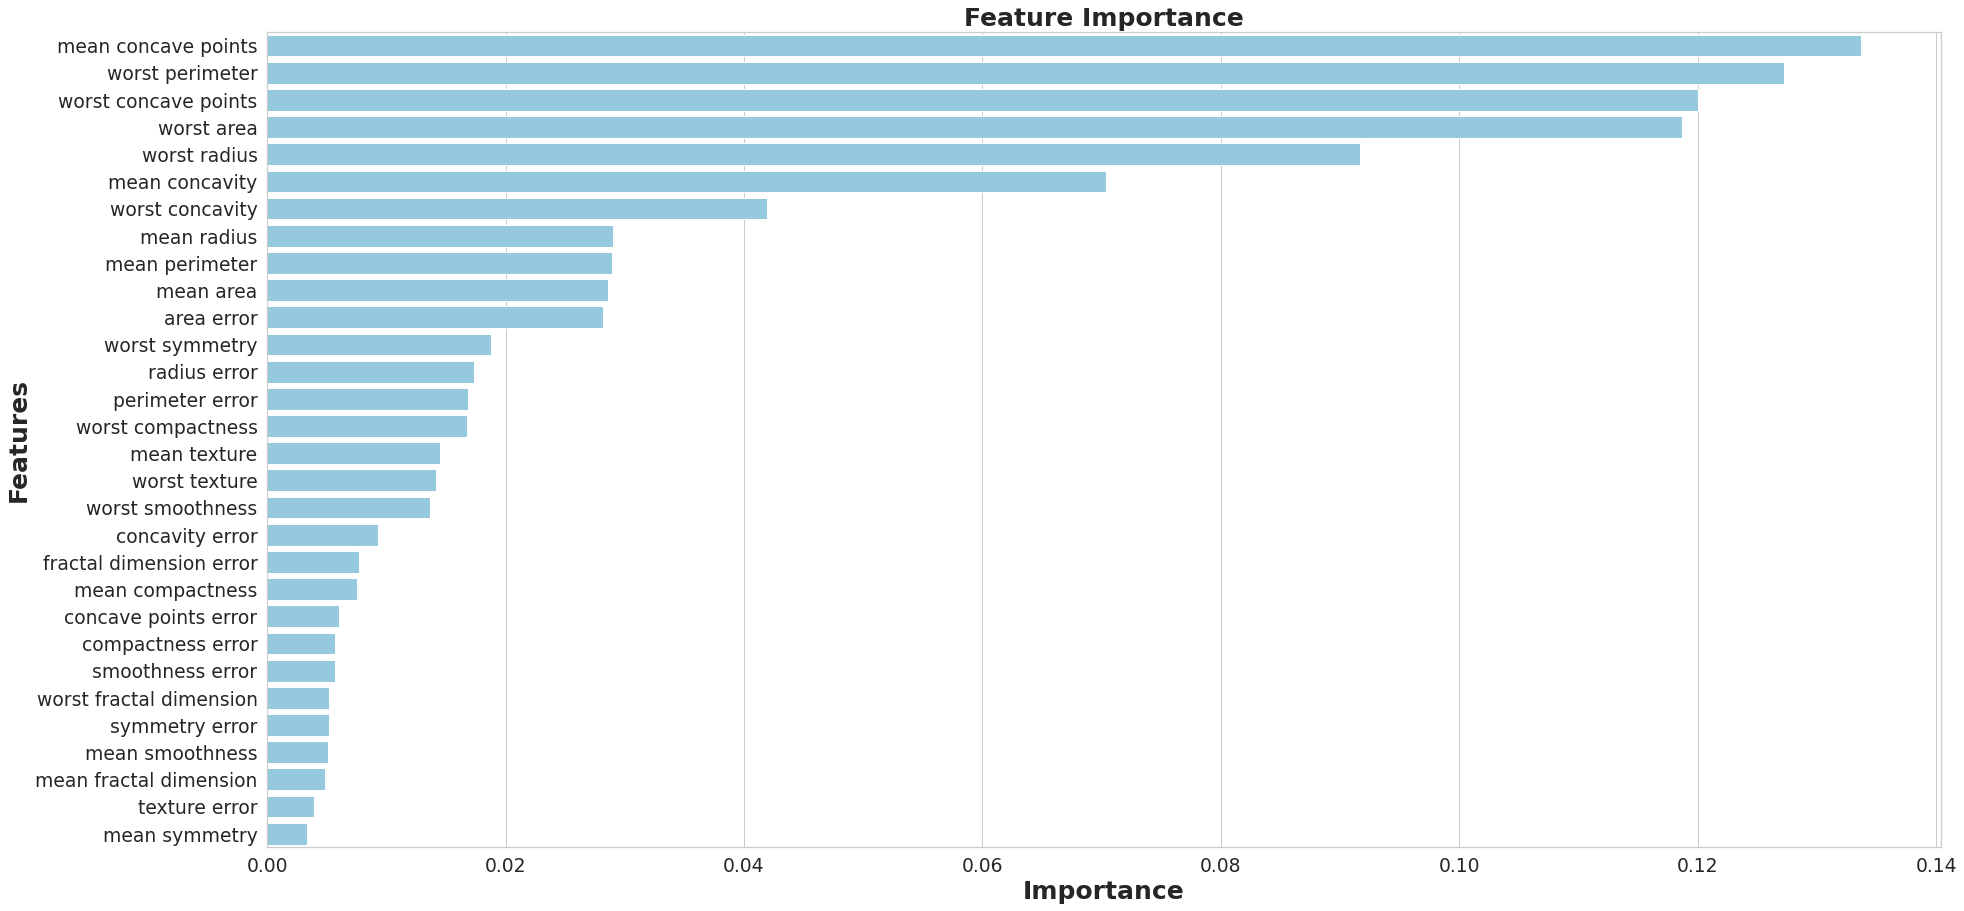

None

In [48]:
def get_important_features(model):
    feats = {}
    for feature, importance in zip(df_features.columns, model.feature_importances_):
        feats[feature] = importance

    importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
    importances = importances.sort_values(by='Gini-Importance', ascending=False)
    importances = importances.reset_index()
    importances = importances.rename(columns={'index': 'Features'})
    display(importances)
    return importances

importances = get_important_features(rfc)

def plot_important_features(importances):
    sns.set(font_scale = 5)
    sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
    fig, ax = plt.subplots()
    fig.set_size_inches(30,15)
    sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
    plt.xlabel('Importance', fontsize=25, weight = 'bold')
    plt.ylabel('Features', fontsize=25, weight = 'bold')
    plt.title('Feature Importance', fontsize=25, weight = 'bold')
    display(plt.show())

# Plot feature importance
plot_important_features(importances)  

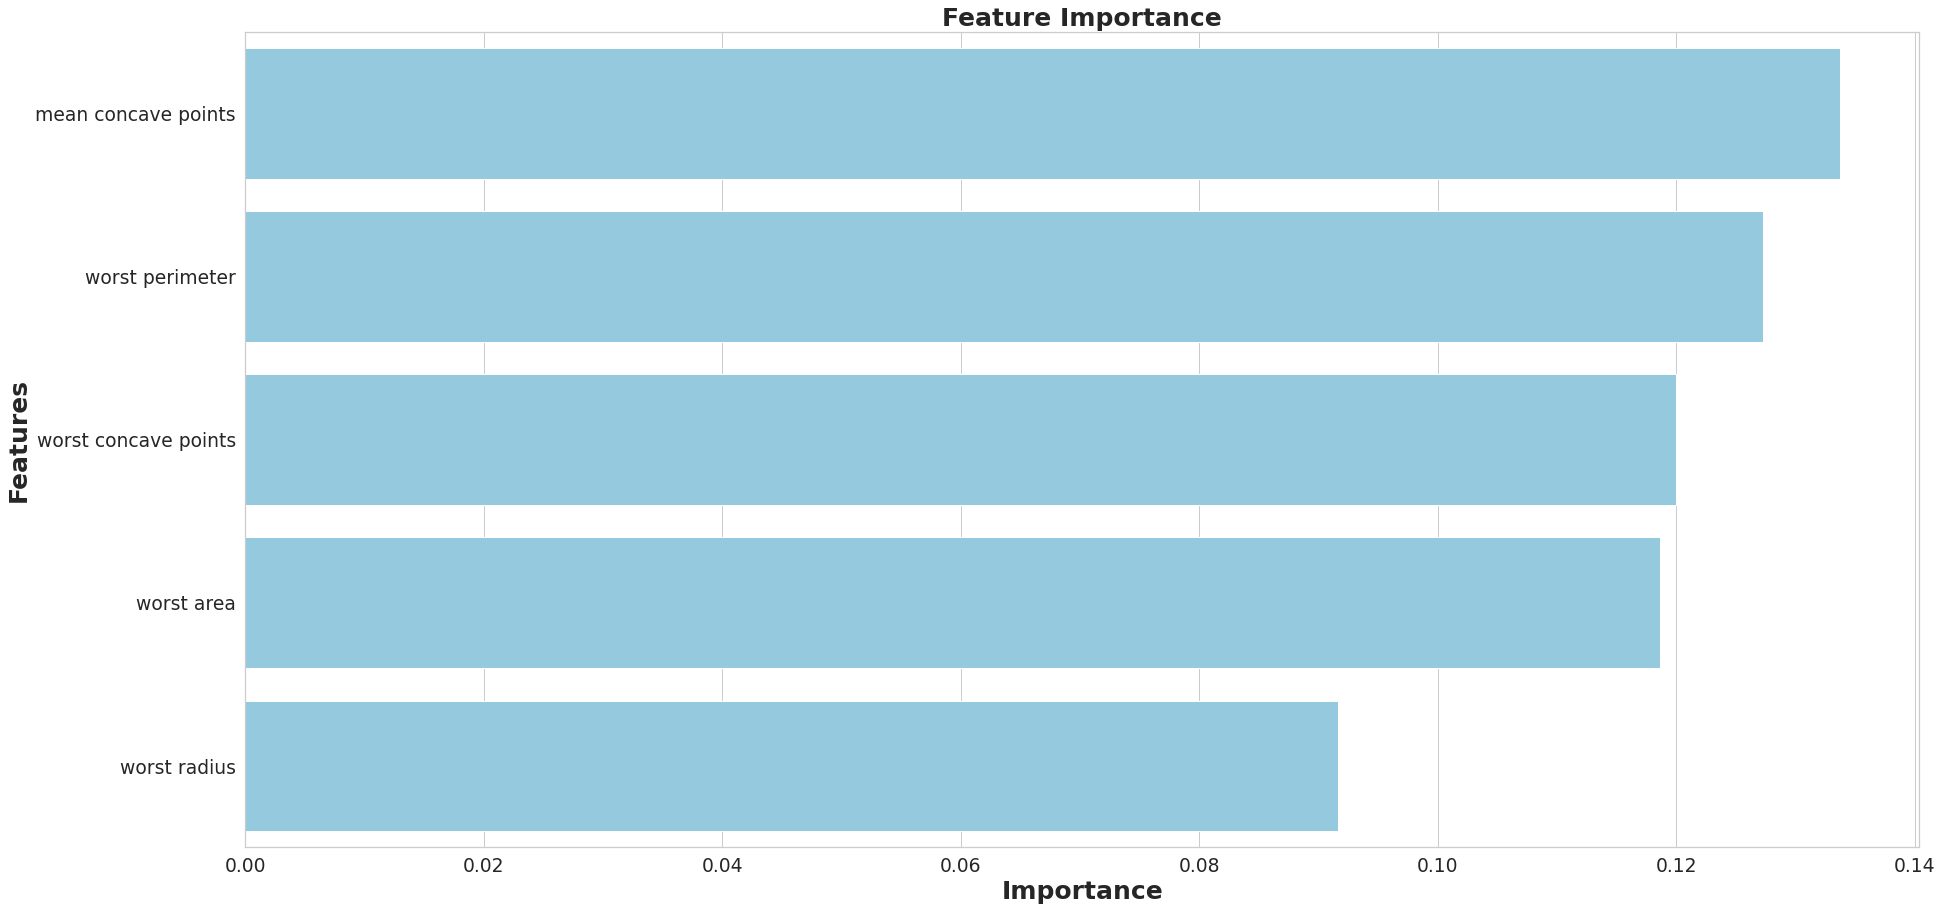

None

['mean concave points', 'worst perimeter', 'worst concave points', 'worst area', 'worst radius']


In [49]:
# Get most_important features k = 5
importances = importances[:5]
# Plot most_important features
plot_important_features(importances) 

important_rf_features = list(importances['Features'])
print(important_rf_features)

In [50]:
print("Las características selecionadas por SelectKBest  son: ", list(selected_features))
print("Las características selecionadas por RF feature importance son: ",important_rf_features)

Las características selecionadas por SelectKBest  son:  ['mean perimeter', 'mean area', 'area error', 'worst perimeter', 'worst area']
Las características selecionadas por RF feature importance son:  ['mean concave points', 'worst perimeter', 'worst concave points', 'worst area', 'worst radius']


Se observa que las características escogidas por cada uno de los métodos de selección de características son distintas.

Ahora entrenamos el modelo con las características escogidas por RF

In [51]:
y = df_target['target']
X = df_features[important_rf_features] #Escogemos solo las columnas mas representativas para el modelo RF
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42) 

In [52]:
X.head()

,mean concave points,worst perimeter,worst concave points,worst area,worst radius
0,0.14710,184.60,0.2654,2019.0,25.38
1,0.07017,158.80,0.1860,1956.0,24.99
2,0.12790,152.50,0.2430,1709.0,23.57
3,0.10520,98.87,0.2575,567.7,14.91
4,0.10430,152.20,0.1625,1575.0,22.54


In [53]:
# Fit the model
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
# Make predictions on test data
y_pred = rfc.predict(X_test)
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 62   5]
 [  2 119]]


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95        67
           1       0.96      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.95      0.96       188
weighted avg       0.96      0.96      0.96       188

